In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(0, 0.01)

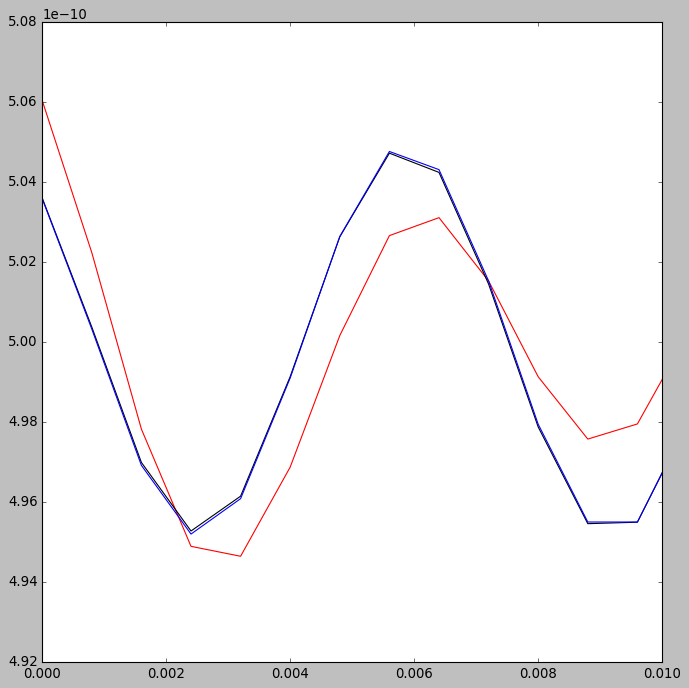

In [48]:
figsize(10,10)
fs = 10000
t = linspace(0,10,10*fs)
z_m = 0.5*cos(100*2*pi*t) + cos(150*2*pi*t+0.15*pi)
z_sig = cos(150*2*pi*t+0.15*pi)
z_noise = 0.5*cos(100*2*pi*t)
kappa = -0.01
mod = cos(1250*2*pi*t)
I_0 = 1e-9*mod
cur_m = I_0*exp(-kappa*z_m)
cur_sig = I_0*exp(-kappa*z_sig)
cur_noise = exp(-kappa*z_noise)

liy_m = repeat(average((mod*cur_m).reshape(-1,8),axis=1),8)
liy_sig = repeat(average((mod*cur_sig).reshape(-1,8),axis=1),8)
liy_noise = repeat(average((cur_noise).reshape(-1,8),axis=1),8)
# plot(t,cur_m)
plot(t[::8],liy_m[::8],'r')
# plot(t,liy_noise)
plot(t[::8],liy_m[::8]/liy_noise[::8],'k')
plot(t[::8],liy_sig[::8],'b')
xlim(0,0.01)

(-10, 1500)

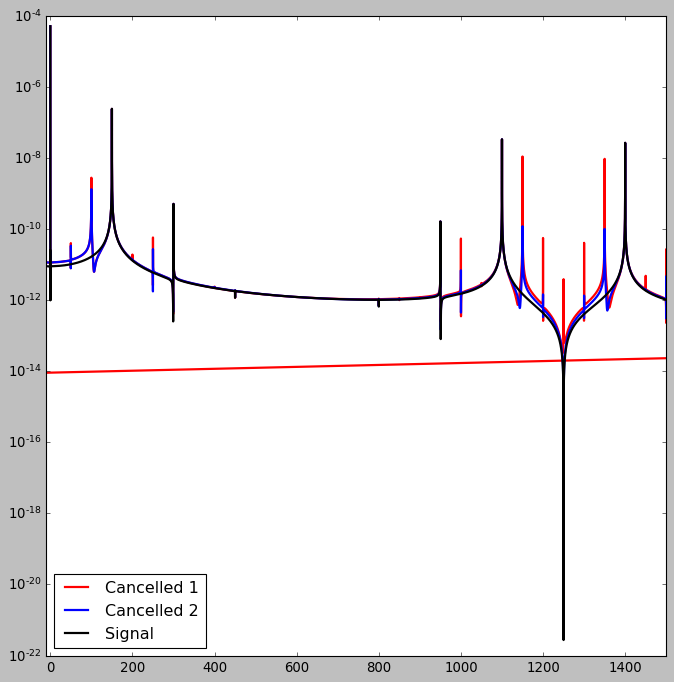

In [49]:
fft_z_m = fft.fft(z_m)
fft_z_sig = fft.fft(z_sig)
fft_z_noise = fft.fft(z_noise)
fft_cur_m = fft.fft(cur_m)
fft_cur_sig = fft.fft(cur_sig)
fft_cur_noise = fft.fft(cur_noise)
fft_liy_m = fft.fft(liy_m)
fft_liy_sig = fft.fft(liy_sig)
fft_liy_noise = fft.fft(liy_noise)

fft_cur_canc = fft.fft(cur_m/cur_noise)
fft_liy_canc = fft.fft(liy_m/cur_noise)
fft_liy_canc2 = fft.fft(liy_m/liy_noise)

freqs = fft.fftfreq(len(liy_sig),1/fs)
# semilogy(freqs,absolute(fft_liy_m),label='Measured')
semilogy(freqs,absolute(fft_liy_canc),'r',linewidth=2,label='Cancelled 1')
semilogy(freqs,absolute(fft_liy_canc2),linewidth=2,label='Cancelled 2')
semilogy(freqs,absolute(fft_liy_sig),'k',linewidth=2,label='Signal')


# semilogy(freqs,absolute(fft_liy_noise),label='Noise')
legend(loc=3)
xlim(-10,1500)
# ylim(1e-14,1e-6)

In [ ]:
rep = fs/w_mod #Number of points that are integrated over
#This caclulation replicates the lock in integral *Equation 2.13
liy_noise = repeat(mean(cur_noise.reshape(-1,rep),axis=1),rep)
#Equation 2.14
liy_sig = liy_test/liy_noise


(0, 4e-11)

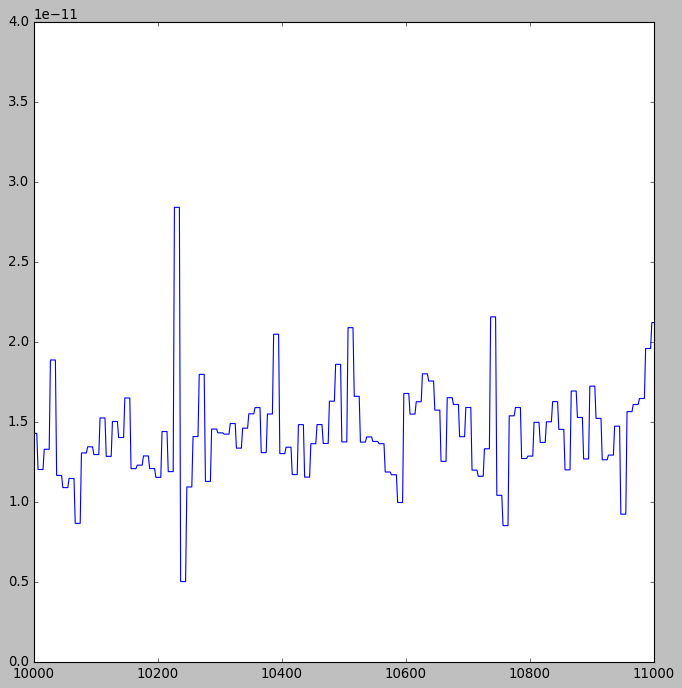

In [421]:
folder_loc = '2020-03-13/Spec Sweep Noisy 62/'
file_loc = '2020-03-13-20-57_spec_noisy2008.dat'
x = np.loadtxt(folder_loc+file_loc, skiprows=76)
plot(x[:,8])
xlim(10000,11000)
ylim(0,0.4e-10)

In [3]:
#load Z-spectroscopy data that was recorded
folder_loc = '2020-03-13/'
file_loc = ['kappa00002.dat','kappa00003.dat','kappa00004.dat',
            'kappa00005.dat','kappa00006.dat']
#Initialize the fit parameters
#  *It is a 1st degree fit so only slope and dc offset are needed
z = np.zeros((5,102))
cur = np.zeros((5,102))
fit = np.zeros((5,2))
#Iterate through each file name and load the corresponding data
#  Each file has 2 columns, the Z position and the corresponding current value
for i,name in enumerate(file_loc):
    spec = np.loadtxt(folder_loc+name,skiprows=126)
    #Seperate the columns of each data set
    z[i,:] = spec[:,0]    
    cur[i,:] = spec[:,1]
    #Fit the log of the current data with a 1 degree polynomial
    fit[i,:] = np.polyfit(spec[:40,0], log(abs(spec[:40,1])),1)
#Average together all the fit parameters 
fit = mean(fit,axis=0)
#kappa is equal to the slope of the fit
kappa = fit[0]
print(kappa)

-34715365715.10908


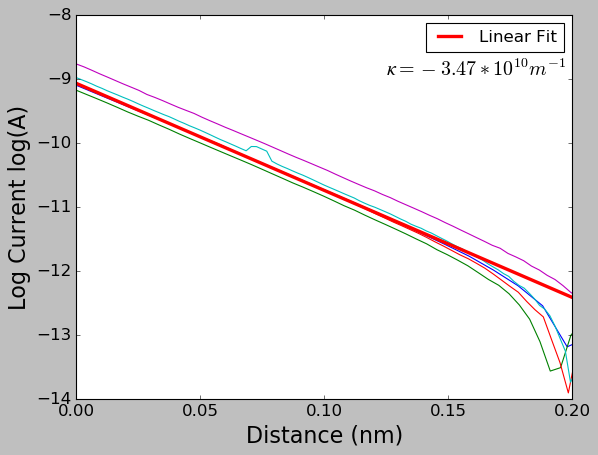

In [57]:
plt.style.use('classic')

fig,ax = subplots(1,1)
figsize(10,10)
fitted = np.zeros(102) #this is the length of the loaded files
for i in arange(5): #Iterate through each set of data, plotting it
    #Create an object to fit the log of the current data
    #Kappa represents the fit of the linear portion of the data
    #  which in this data is only at the beginning
    p = np.poly1d(np.polyfit(z[i,:30], log10(abs(cur[i,:30])),1))
    #plot the log of the current data against the z position of the tip
    ax.plot(1e9*(z[i,:]-z[i,0]),log10(abs(cur[i,:])),'-')
    fitted += p(z[i,:]) #sum the fitted data sets together
#plot the average fit to the data sets
ax.plot(1e9*(z[1,:]-z[1,0]),fitted/5,'r',linewidth=3,label='Linear Fit')
xlim(0,0.2)
ylim(-14,-8)
#Print the corresponding kappa value on the plot
ax.text(0.125,-8.95,'$\u03BA = -3.47 * 10^{10} m^{-1}$ ',fontsize=18)
ax.tick_params(labelsize=15)
ax.set_xlabel('Distance (nm)',size=20)
ax.set_ylabel('Log Current log(A)',size=20)
ax.legend(loc=1,fontsize=15)
savefig('2020-03-13 Kappa calc',transparent=True)

In [7]:
folder_loc = 'Albert_Data/2019-10-17/'
file_loc = ['Z-Spectroscopy00001.dat','Z-Spectroscopy00002.dat','Z-Spectroscopy00003.dat','Z-Spectroscopy00004.dat',
           'Z-Spectroscopy00005.dat','Z-Spectroscopy00006.dat','Z-Spectroscopy00007.dat','Z-Spectroscopy00008.dat',
           'Z-Spectroscopy00009.dat','Z-Spectroscopy00010.dat','Z-Spectroscopy00011.dat','Z-Spectroscopy00012.dat',
           'Z-Spectroscopy00013.dat','Z-Spectroscopy00014.dat','Z-Spectroscopy00015.dat']
z_al = np.zeros((15,512))
cur_al = np.zeros((15,512))
for i,name in enumerate(file_loc):
    spec_al = np.loadtxt(folder_loc+name,skiprows=18)
    z_al[i,:] = spec_al[:,0]
    cur_al[i,:] = spec_al[:,1]

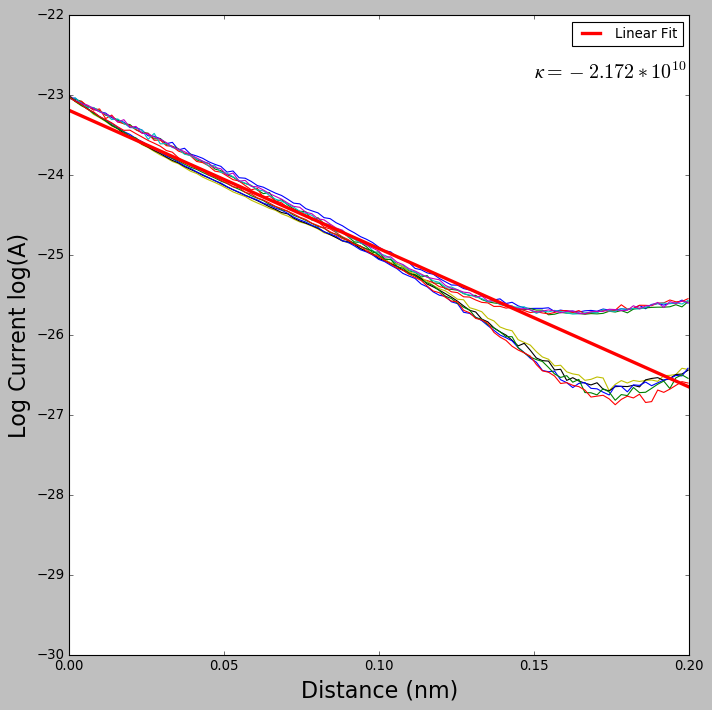

In [10]:
plt.style.use('classic')
figsize(10,10)
fig,ax = subplots(1,1)
ax.text(0.15,-22.8,'$\u03BA = -2.172 * 10^{10}$',fontsize=18)
fitted = np.zeros(512)
for i in arange(10):
    i = i+5
    j = i
    p = np.poly1d(np.polyfit(z_al[j,:], log(abs(cur_al[i,:])),1))
    fit = np.polyfit(z_al[j,:40], log(abs(cur_al[i,:40])),1)
#     print(i,fit)
    
    ax.plot(1e9*(z_al[j,::5]-z_al[j,0]),log(abs(cur_al[i,::5])),'-')
    fitted += p(z_al[j,:])
#     plot(1e9*(z[j,:]-z[j,0]),p(z[j,:]),'k')
ax.plot(1e9*(z_al[1,:]-z_al[1,0]),fitted/10,'r',linewidth=3,label='Linear Fit')
xlim(0,0.2)
ylim(-30,-22)
xlabel('Distance (nm)',size=20)
ylabel('Log Current log(A)',size=20)

legend(loc=1,fontsize=12)
plt.show()

(-0.01, 1)

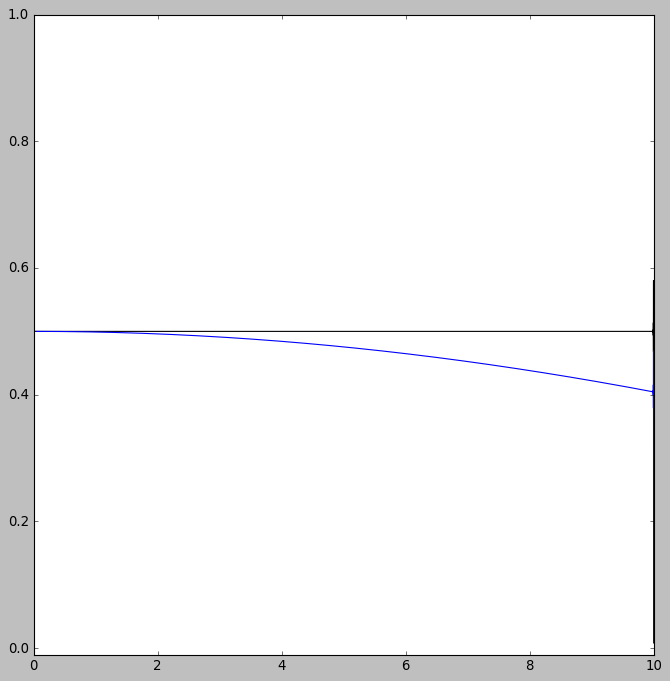

In [37]:
from scipy import signal
t = linspace(0,10,10*10000)
ref = sin(1000*2*pi*t)
x1 = sin(1000*2*pi*t)
x2 = sin(1000.01*2*pi*t)
lock1 = ref*x1
lock2 = ref*x2
sos = signal.butter(6,500,'lowpass',fs=10000,output='sos')
filt1 = signal.sosfiltfilt(sos,lock1)
filt2 = signal.sosfiltfilt(sos,lock2)
plot(t,filt1,'k')
plot(t,filt2,'b')
xlim(0,10)
ylim(-0.01,1)